# Statistical hypothesis testing

In [3]:
# Import libraries needed:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl          # needed to set global font size for plots later.
from scipy.stats import t         # for working with Student's t distribution
from scipy.stats import chi2      # for working with chi-squared distribution
from scipy.stats import poisson   # for working with Poisson distribution
from scipy.stats import norm      # for working with the normal/Gaussian distribution   

# Set global font size for plots:
mpl.rcParams['font.size'] = 14
# (see https://matplotlib.org/tutorials/introductory/customizing.html).

### **Question 1**. 

Explain the difference between a one-tailed and a two-tailed statistical hypothesis test **in your own words**.

**(1.5 points)**

## Answer 1 ##

The main difference between the one - tailed and the two - tailed statistical test is that the two - tailed test is used to test for how likely a sample/population property is equal to a hypothesized value, whereas the one - tailed test is used to test whether a sample/population property is larger or smaller than a hypothesized value. This will result in different null hypothetheses; e.g. a 2 - tailed test null hypothesis could be "The population has a mean $ \mu = 15 $" but for a 1 - tailed tail the null hypothesis could be "The population mean is $ \mu >15 $". Another big difference would be significance levels for the tests. Lets say we have threshold p - value of $ p_t = 0.05 $ and we are testing a Gaussian distribution, the two - tailed test will "split" the 5% into 2 rejection regions, one region for the top 2.5% of values for the Gaussian distribution and another for the lowest 2.5% of values. This is different for a one - tailed test, because we only test in one direction, so we keep the entire rejection region on one side - the right if our null hypothesis states that the actual value is bigger, or on the left if our hypothesis states the opposite.

### **Question 2.**

In light of what we have seen about $\chi^2$ goodness-of-fit tests, explain why the reduced $\chi^2$ statistic  for a good fit with $K$ degrees of freedom is typically close to one. Use your own words.

**(1.5 points)**

## Answer 2 ##

For a $ \chi ^2$ goodness-of-fit test, we use the $ \chi ^2$ statistic. This statistic follows a $ \chi ^2$ distribution with $K$ degrees of freedom, centred around a mean $\mu = K$. Therefore, for a "good fit", other than minimising the observed $ \chi ^2$ for the data, we would also require that the observed $ \chi ^2$ is close to the distribution mean, $\mu = K$. Generally, the closer the two values are, the better the fit. Thus, for a "perfect fit" we expect the $\chi _o ^2$ value to equal $K$. Remembering that the $ \chi_{reduced} ^2 = \chi _o ^2/K$, we see that for a "good fit" ($ \chi _o ^2 \approx K$) we can write $ \chi_{reduced} ^2 = \chi ^2/K \approx K/K \approx 1$.

### **Question 3**.

Consider the following near-normal sample data set (see array x_data below):

- **a)** **(0.75 points)** Calculate the Student's t statistic ($t_{\mathrm{obs}}$) for a test of the hypothesis that the population mean is $\mu = 6$. What does the observed t value mean?
- **b)** **(0.75 points)** What distribution does the t statistic follow (be specific regarding distribution parameters). Plot the corresponding probability density function. 
- **c)** **(1 point)** What can we say about our hypothesis that the population from which our data is sampled has a mean equal to $\mu = 6$? Explain and justify your answer.

**(2.5 points in total)**

Python hints: 

- You can calculate the mean of an array of values, x_list, as np.mean(x_list).
- You can calculate the absolute value of a variable A as abs(A).
- You can calculate the standard deviation of an array of values, x_list, as np.std(x_list).
- Remember that you can get the number of elements in an array as len(x_list);
- Avoid naming your t statistic variable "t". Use "t_value" or similar instead to avoid confusion with t from scipy.stats.


## Answer 3 ##
**a)** To calculate the Student's t -statistic, we will use the following formula: 

$$t = \frac{|\bar{x}-\mu|}{\mathrm{SE}}\,.$$

Where $\mu $ is the hypothesized population mean, $\bar x$ is the mean of the sample data set, and $\mathrm{SE}$ is the standard error of the mean, which has the following formula:

$$\mathrm{SE} = \frac{s}{\sqrt{n-1}} $$

Where s is the sample standard deviation, given by:

$$ s = \sqrt{\frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n}}\,, $$

But of course, in python we have standard deviation as a built in function of numpy, so there is no point calculating this manually. 

The final calculated value of the Student's t - statistic is called observed t - value, denoted as $ t_{obs} $. This value represents the difference between hypothesized mean and the sample mean, in terms of standard errors. In other words, it shows the number of standard errors the hypothesized mean is away from the sample mean.

In [37]:
x_data = np.array([12,  9,  5,  3,  8,  5,  6,  6,  4,  8])

In [38]:
n = len(x_data) #number of data points in sample data set
s = np.std(x_data) #standard deviation of data set
mu = 6 #hypothesized population mean
x_bar = np.mean(x_data) #mean of sample data
standard_error = s/(np.sqrt(n - 1)) #standard error of mean
t_obs = (abs(x_bar - mu))/standard_error #observed t - statistic
K = n - 1 #degrees of freedom

print("The Student's t - statistic was calculated to be", t_obs)

The Student's t - statistic was calculated to be 0.7092993656151902


**b)** The t - statistic follows the Student's t distribution, with $K = n - 1$ degrees of freedom, which would be $K = 9 $ for our sample data set. Below I plotted the probability density function using the scipy.stats library.

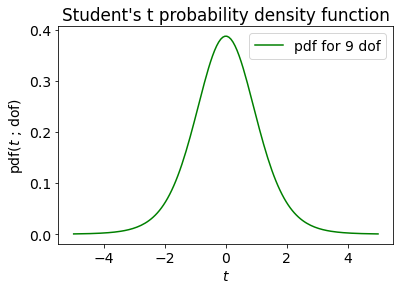

In [41]:
x_points = np.linspace(-5,5,150) #chosen 150 points for a smooth plot

plt.figure()
plt.plot(x_points,t.pdf(x_points,9),'g', label="pdf for 9 dof") #plotting pdf for student's t dist
plt.xlabel("$t$")
plt.ylabel("pdf($t$ ; dof)")
plt.legend(loc="best")
plt.title("Student's t probability density function");

**c)** We can calculate the p - value for our calculated $ t_{obs} $ by using the cumulative distribution function and survival function using the formula below:

$$\begin{eqnarray}
	\nonumber p & = & P(t \leq -t_{\mathrm{obs}} ; K) + P(t \geq t_{\mathrm{obs}} ; K) = \\
	\nonumber  & = & \int_{-\infty}^{-t_{\mathrm{obs}}} \mathrm{pdf}(t ; K) dt + \int_{t_{\mathrm{obs}}}^{\infty} \mathrm{pdf}(t ; K) dt = \\
	\nonumber & = & \mathrm{CDF}(-t_{\mathrm{obs}} ; K) + \mathrm{SF}(t_{\mathrm{obs}} ; K) \,,
	  \label{eq:p-value-Student-t}
\end{eqnarray}
$$

which we then compare to the threshold p - value to determine whether to reject the null hypothesis or whether we have no reason to reject it.

In [21]:
p_value_q3 = t.cdf(-t_obs, K) + t.sf(t_obs, K) #using function t from scipy.stats library
print("The p - value for our observed t- value is", p_value_q3)

The p - value for our observed t- value is 0.49610155552452073


Our p - value is then $\approx 0.5$. This means that there is around a 50% possibility of finding a sample mean within $\sim 0.71$ standard errors of the population mean and similarly around 50% chance to find a sample mean outside of that range. So the chances of finding $\mu = 6$ or greater as a result of sampling errors is around 50%. As we were not given a threshold p - value, we will compare our value to the conventional threshold value of $p_{thres} = 0.05 $. We can see that $p_{thres} << p$, so there would be no reason to reject a null hypothesis that states that the population from which the sample data set was taken from has a mean $\mu = 6$.

### **Question 4**

Consider the following data (x_data and y_data arrays below) and fit, for which the vertical error bars are $\Delta y_i = 60$, the least-squares best fit to a 3rd-order polynomial gives $y(x) = a_0 x^3 + a_1 x^2 + a_2 x + a_3$, with the fit parameters shown below, and the observed $\chi^2$ statistic is $\chi^2_{\mathrm{obs}} \approx 8.60$ (all obtained with the code in the cell below).

Is this polynomial fit a good fit for this data set? Perform the relevant statistical test explaining the type of test you choose, the testing procedure step by step and the relevant distribution and parameters you use. Comment on your results. Consider that the error bars have been correctly estimated.

Make sure you run the code cell below if you want to reuse the variables x_data, y_data, chi2_obs, etc.

**(2.5 points)**

a_0 = 0.41 ± 0.30
a_1 = -2.54 ± 5.89
a_2 = 30.24 ± 32.21
a_3 = 38.33 ± 46.54


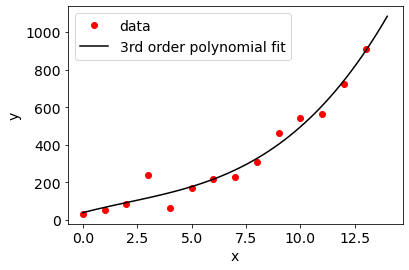

The observed chi-squared statistic for this fit is 8.60


In [23]:
x_data = np.array(np.arange(0,14))
y_data = np.array([ 31.55197512,  53.73190604,  82.03605485, 236.38912334,
        62.44037039, 171.03790287, 216.36546313, 227.73651921,
       306.61998892, 462.41489012, 540.76941364, 565.98393434,
       723.38230323, 909.84808988])

# Fit to a 3rd order polynomial:
degree = 3       # degree of polynomial to fit
fit, cvm = np.polyfit(x_data, y_data, degree, cov=True) # fit function
# Outputs of np.polyfit are fit parameters (fit) and covariance matrix (cvm).

# To obtain the uncertainties of the fit parameters, we get the diagonal elements
# of the covariance matrix and take the square root:
err = np.sqrt(np.diag(cvm))

# Print fit parameters (from higher to lower power of x) with their errors (to 0 decimal places):
[print("a_{0} = {1:0.2f} \xb1 {2:0.2f}".format(i,fit[i],err[i])) for i in range(len(fit))];

# Calculate smooth curve to plot:
xcurve = np.array(np.linspace(0,14,60))   # create array (60 points) to plot a smooth fitted curve.
ycurve = fit[0]*xcurve**3 + fit[1]*xcurve**2 + fit[2]*xcurve + fit[3]   # calculate fitted curve.

# Plot data and fitted curve:
plt.plot(x_data, y_data, 'ro', label="data")                    # plot data as red circles.
plt.plot(xcurve, ycurve, 'k', label="3rd order polynomial fit")       # plot black curve for fit.
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Calculate observed chi-squared statistic: 
delta_y = 60      # vertical error bar
y_fitted = fit[0]*x_data**3 + fit[1]*x_data**2 + fit[2]*x_data + fit[3]   # fitted y values
residuals = y_data - y_fitted       # residuals
residuals_norm = residuals/delta_y  # normalised residuals

chi2_obs = np.sum(residuals_norm**2)  # chi-squared parameter, sum of squared normalised residuals
print("The observed chi-squared statistic for this fit is {:.2f}".format(chi2_obs))

Reminder: The **$\chi^2$ statistic** in a goodness-of-fit $\chi^2$ test is the sum of squared normalised residuals:

$$ \chi^2 = \sum_{i=1}^n \left(\frac{y_i - y_{\mathrm{fitted}}(x_i)}{\Delta y_i} \right)^2\,,$$ 

where $\Delta y_i$ is the experimental uncertainty in the measurement of the $y_i$ data point and $y_{\mathrm{fitted}}(x_i)$ is the fitted function or model evaluated at our $x_i$ sample values. 

## Answer 4 ##
I am choosing to use the $ \chi^2 $ goodness-of-fit test for checking how good of a fit a model is to a data set.

First, we should consider reduced $ \chi^2 $ statistic, even though it is not strictly part of the test, it is a general indication of how good of a fit a model is to your data. For this, we will need to calculate the degrees of freedom which is given by the formula below:

$$ K = n - m $$

Where n is the number of data points and m is the number of fit parameters used in the fitting function. From above, we see that the function uses 4 fit parameters:

$$ 𝑦(𝑥)=𝑎_0𝑥^3+𝑎_1𝑥^2+𝑎_2𝑥+𝑎_3 $$

Which are $ a_0,a_1,a_2$ and $a_3$. There are 14 data points in our data set. This gives the number of degrees of freedom as $K = 14 - 4 = 10$.

We can the calculate reduced chi squared using: $$ \chi_{reduced}^2 =  \chi^2 / K $$

The result is displayed on the next code cell.

In [43]:
K1 = 14 - 4 #degrees of freedom, named K1 to differentiate between K from earlier section
reduced_chisqr = chi2_obs/K1
print("The reduced chi squared statistic is: {:.2f}".format(reduced_chisqr),"\n")

The reduced chi squared statistic is: 0.86 



A quick glance at the results tells us that this model is a good fit for the data points, as the reduced chi - squared statistic is close to 1.

Commencing the actual goodness-of-fit test -
our null hypothesis will be:

$H_0$ : The fitted model, shown below, is a good fit for the data.


$$ 𝑦(𝑥)=0.41𝑥^3-2.54𝑥^2+30.24𝑥+38.33 $$


We must keep in mind that this test is one tailed, and we are only interested in p - values on the right hand side of mean, so we will use the survival function to calculate the p - value for our test. The last code cell for this question shows graphically how the survival function is used to calculate the p -value.

Just an initial observation: our observed chi - squared value ($\chi_o ^2$) is 8.6, and looking at the graph in the next code cell of the probability density function of our $\chi^2$ distribution, we can see that 8.6 roughly lies in the middle of the distribution, so that the survival function should, by eye, return a p - value close to 0.5. This graph below also shows that we definitely will not reject our null hypothesis as it is much bigger than any conventional values of the threshold p - value.

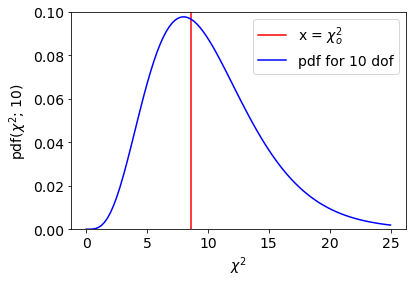

In [72]:
x1 = np.linspace(0,25,100)
pdf1 = chi2.pdf(x1,K1)

plt.figure()
plt.plot([8.6,8.6],[0,0.2],'r', label = "x = $\chi_o ^2$")
plt.plot(x1,pdf1,'b', label = "pdf for 10 dof")
plt.xlabel("$\chi^2$")
plt.ylabel("pdf($\chi^2$; 10)")
plt.ylim((0,0.1))
plt.legend(loc = "best")
plt.show()

In the next code cell below, I calculate the p - value for our observed $\chi^2$. This is done for 10 degrees of freedom, using the survival function, from the chi2 function from the scipy.stats library. Alongside, I have also calculated the p - value for the expected value, and the mean plus 2 standard deviations. I did this for comparison purposes. Comparing the p - value to the p -value of the mean can give us hints of overfitting, and the p - value for the mean plus 2 standard deviations is the typical cut off point for rejection (anything further away is rejected).

In [73]:
p_value = chi2.sf(chi2_obs, K1)    # p-value of observed chi2 statistic
p_mean = chi2.sf(K1, K1)      # p-value corresponding to the mean
p_mean_2std = chi2.sf(K1+2*np.sqrt(2*K1),K1) # p-value corresponding to the mean+2*standard devs
print("The calculated p-value is: {:.2f}".format(p_value))
print("The p-value for the mean, SF(K; K) is: {:.2f}".format(p_mean))
print("The p-value for mean+2*stdev, SF(K+2*sqrt(2K); K) is: {:.3f}".format(p_mean_2std))

The calculated p-value is: 0.57
The p-value for the mean, SF(K; K) is: 0.44
The p-value for mean+2*stdev, SF(K+2*sqrt(2K); K) is: 0.041


Finally, I will conclude that because $p \approx 0.57$ and the typical threshold value is $p_{thres} = 0.05$, I cannot reject the null hypothesis as $p >> p_{thres}$. Although the p - value is quite a bit higher that the p - value for the mean, it is not an overly big difference, so we can safely say that it does not suggest overfitting. Another indication that this model is a good fit for our data is the fact that the reduced $\chi^2$ is very close to 1.

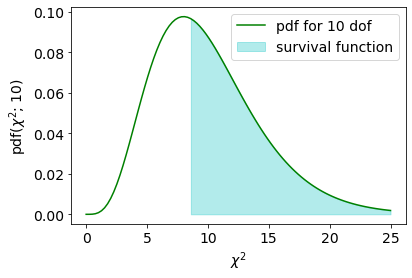

In [76]:
x1 = np.linspace(0,25,100)
pdf1 = chi2.pdf(x1,K1)

x3 = np.linspace(chi2_obs,25,50)
y3 = chi2.pdf(x3,K1)

plt.figure()
plt.plot(x1,pdf1,'g',label = "pdf for 10 dof")
plt.xlabel("$\chi^2$")
plt.ylabel("pdf($\chi^2$; 10)")
plt.fill_between(x3,y3,0, alpha=0.3, color='c', label = "survival function")
plt.legend(loc = "best")
plt.show()

### **Question 5** 

Given the following data below (50 data points in array x_data), acquired by throwing a dice 50 times, we would like to know if the dice is fair as opposed to biased, i.e, we would like to know if the data is consistent with a uniform probability distribution. 

A uniform probability distribution is a distribution with constant probability, in which all possible results of throwing the dice have an equal probability of 1/6. A uniform distribution is also known as a rectangular distribution and it is a distribution with 2 parameters (here, the minimum value 1 and the maximum value 6).

Below, the the possible results when throwing the dice (1, 2, 3, 4, 5 or 6) are given as variable "unique". The number of times that each of these results occurs in the data (observed occurrences) is given as variable "occur_obs" below. The total number of occurrences is 50 (equal to the total number of throws of the dice).

The expected number of occurrences for each result, considering the uniform probability distribution that characterises a fair dice, is simply the probability for each result times the total number of occurrences, i.e. $~50 \times\frac{1}{6} \sim 8.333\ldots$. The expected occurrences for all results are given below as variable "occur_exp".

Perform the relevant statistical hypothesis test to answer whether the dice is fair/unbiased and whether the observed sample can be assumed to have been drawn from a uniform distribution. Explain the type of test you choose, the testing procedure step by step and the relevant statistic, distribution and parameters you use. Comment on your results. 

Make sure you run the code cells below if you want to reuse the variables x_data, unique, occur_obs, occur_exp, etc.

**(2 points)**

In [4]:
x_data = np.array([4, 1, 6, 2, 4, 4, 1, 5, 4, 1, 4, 5, 1, 6, 3, 6, 2, 4, 4, 6, 4, 2,
                   5, 5, 1, 3, 1, 1, 5, 5, 1, 4, 2, 3, 1, 5, 3, 4, 3, 3, 1, 6, 2, 2,
                   1, 1, 1, 2, 5, 6])

# Find unique values and their number of occurrences within the data:
unique, occur_obs = np.unique(x_data, return_counts=True)   

print("Possible results of throwing the dice: ", unique, "\n")
print("Observed occurrences for each possible result:", occur_obs, "\n")  

# Expected occurrences from uniform distribution for fair dice:
occur_exp = np.ones(6)*50/6 
print("Expected occurrences for each possible result for fair dice:", "\n", occur_exp) 

Possible results of throwing the dice:  [1 2 3 4 5 6] 

Observed occurrences for each possible result: [13  7  6 10  8  6] 

Expected occurrences for each possible result for fair dice: 
 [8.33333333 8.33333333 8.33333333 8.33333333 8.33333333 8.33333333]


## Answer 5 ##

Throwing a unbiased die should result in a discrete uniform distribution as the probability of getting 1 to 6 should be equal. Therefore, the null hypothesis is:

$ H_0 $ : The data from the 50 dice throws follows a uniform distribution, and is therefore a fair dice.

we will test this hypothesis using the $\chi^2$ test for distributions. This method involves comparing the histograms of expected and observed occurrences, where the histogram for the expected occurrences should be uniform e.g. all the bars should be the same height. Below I have plotted the histogram for the observed occurences, with a line representing the expected occurrences for a fair die.

The total no. of observed occurrences is equal to the total no. of data points: 50


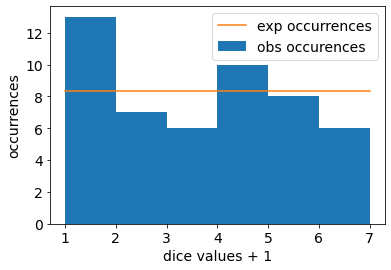

In [6]:
bin_ends = np.array([1, 2, 3, 4, 5, 6, 7])  
bin_width = bin_ends[1] - bin_ends[0]

print("The total no. of observed occurrences is equal to the total no. of data points:",np.sum(occur_obs))

plt.figure()
plt.hist(x_data, bins=bin_ends,label = "obs occurences")
plt.plot([1,7],[8.33,8.33],label = "exp occurrences")

plt.legend(loc="best")
plt.xlabel("dice values + 1")
plt.ylabel("occurrences")
plt.show()

As the occurrences are for a fair die, there is no uncertainty, as we know with 100% certainty that a 100% fair die will return $50/6 = 8.333$ occurrences for each dice value, on average.

But, as we have both the expected and the observed occurrences prepared and all bins have occurrences $>5$, we can calculate the observed $\chi^2$ already, with no additional work. We will use the formula:

$$\chi^2 = \sum_i \frac{\left(O_i-E_i \right)^2}{E_i}\,.$$

Where $O_i$ are the observed occurrences and $E_i$ are the expected occurrences. $i$ represents the bins of the histogram above. We calculate the value below.

In [7]:
chi2_stat = np.sum((occur_obs - occur_exp)**2/occur_exp)
print("The observed chi - squared statistic is", chi2_stat)

The observed chi - squared statistic is 4.4799999999999995


Now, we need to conduct a $\chi^2$ test calculating the p-value using the survival function for the observed $\chi^2$ statistic with the relevant number of degrees of freedom, which are calculated below.

The number of degrees of freedom for this test can be calculated like so: 
$$K = n_{\mathrm{bins}} - m - 1$$

$n_{\mathrm{bins}}$ is the number of bins and $m$ is the number of parameters that define the hypothesised uniform distribution. 

Here, we have $n_{\mathrm{bins}} = 6$, as we have 6 outcomes of rolling the dice and $m = 2$, as the hypothesised uniform distribution has two parameters (the minimum value 1 and the maximum value 6).

Here, we test the hypothesis that our sample distribution matches a uniform distribution with the same mean and same number of measurements as the sample. Therefore, the number of degrees of freedom is $K = 6-3 = 3$.

Noting that this test is one - tailed, we will calulate p-value using the survival function for the observed $\chi^2$ statistic and for 3 degrees of freedom. Represented by $\mathrm{SF} (\chi_\mathrm{observed}^2;3) $, is calculated below.

In [11]:
K2 = len(unique) - 3   # No. degrees of freedom with new name to differentiate first 2 parts
print("The chi-squared statistic for testing our distribution is: {:.2f}".format(chi2_stat))
print("The number of degrees of freedom is K =",K2)

sf5 = chi2.sf(chi2_stat,K2) 
print("p-value: {:.2f}".format(sf5))

The chi-squared statistic for testing our distribution is: 4.48
The number of degrees of freedom is K = 3
p-value: 0.21


As we were not given a threshold, we will use the conventional $p_{thres} = 0.05$. When compared to the p - value given by the survival function, $p \approx 0.21$, we see $p > p_{thres}$. There is no reason to reject the null hypothesis. Therefore, we can conclude that our dice is likely to be fair, and outcomes of rolls of the dice follow a uniform distribution.